Name: Tim Chen

Date: 2/10/2021



**PART A (SLR) [20 pts]**

Create two separate Models Using the Python Jupyter Notebook to investigate the above two research questions as follows.


Step 1: import all our standard libraries. Also include seaborn
	
  Import seaborn as sns


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

1.	Load the CSV file into a dataframe df
2.	Explore the top 5 rows of this dataframe 



In [2]:
df = pd.read_csv('/content/drive/MyDrive/IST347/Week_3/Birthweight_reduced.csv')
df.head()

,id,headcirumference,length,Birthweight,Gestation,smoker,motherage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35,LowBirthWeight
0,1313,12,17,5.8,33,0,24,0,58,99,26,16,0,66,1,0,Low
1,431,12,19,4.2,33,1,20,7,63,109,20,10,35,71,1,0,Low
2,808,13,19,6.4,34,0,26,0,65,140,25,12,25,69,0,0,Normal
3,300,12,18,4.5,35,1,41,7,65,125,37,14,25,68,1,1,Low
4,516,13,18,5.8,35,1,20,35,67,125,23,12,50,73,1,0,Low


3.	How many rows and columns does it have?

In [3]:
df.shape

(42, 17)

4.	See all the columns this dataset has

In [4]:
df.columns

Index(['id', 'headcirumference', 'length', 'Birthweight', 'Gestation',
       'smoker', 'motherage', 'mnocig', 'mheight', 'mppwt', 'fage', 'fedyrs',
       'fnocig', 'fheight', 'lowbwt', 'mage35', 'LowBirthWeight'],
      dtype='object')

Step 2: Using seaborn visualize the pairplots between 'headcirumference', 'length', 'Birthweight', 'mppwt', 'mheight'

In [5]:
# select target cols
cols = df.columns.to_list()
target_cols = cols[1:4] + cols[8:10]
print(target_cols)

['headcirumference', 'length', 'Birthweight', 'mheight', 'mppwt']


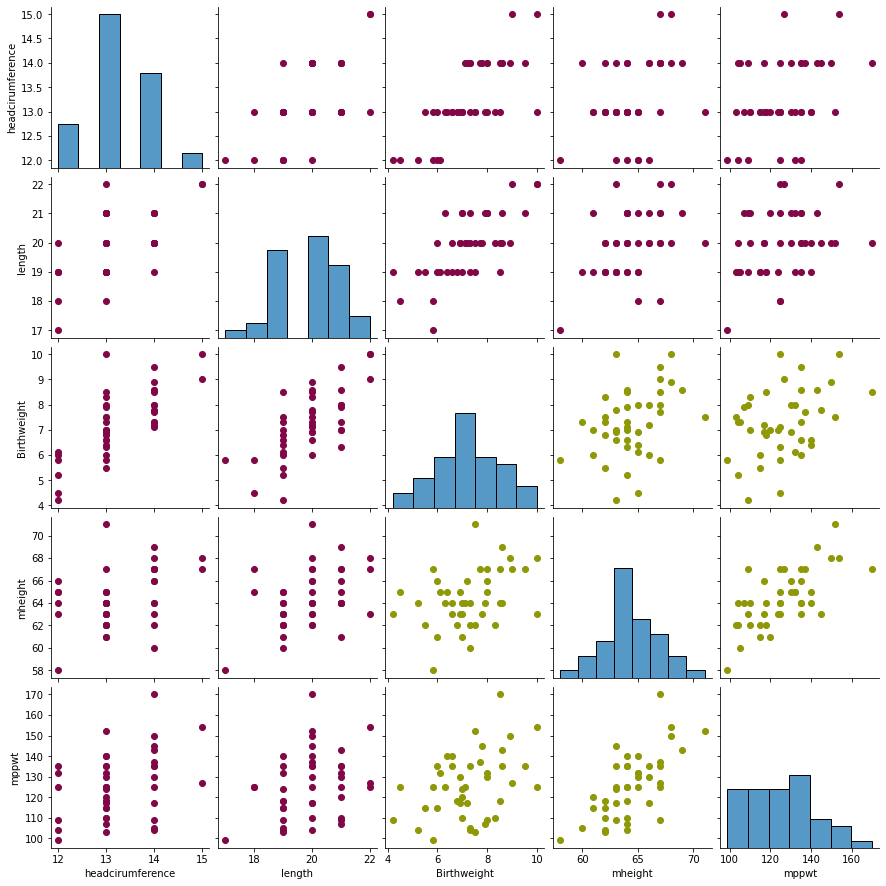

In [6]:
# plot ['headcirumference', 'length', 'Birthweight', 'mheight', 'mppwt'] to sns pairplot
colors = iter(['xkcd:red purple','xkcd:red purple','xkcd:red purple',
               'xkcd:red purple','xkcd:red purple','xkcd:baby poop green','xkcd:red purple',
               'xkcd:red purple','xkcd:baby poop green','xkcd:baby poop green',
               'xkcd:red purple','xkcd:red purple','xkcd:red purple','xkcd:red purple',
               'xkcd:red purple','xkcd:red purple','xkcd:red purple',
               'xkcd:baby poop green','xkcd:baby poop green','xkcd:baby poop green',])

def my_scatter(x,y, **kwargs):
    kwargs['color'] = next(colors)
    plt.scatter(x,y, **kwargs)

# map the hist 
# def my_hist(x, **kwargs):
#     kwargs['color'] = next(colors)
#     plt.hist(x, **kwargs)

pp = sns.pairplot(df[target_cols],markers=["o", "s"])
pp.map_offdiag(my_scatter)

* Comment of what kind of relationship do you see from the plots?

    The scatter plots that are in the color purple don't have any relationship for its features. Other green scatter plots show so-me connection between features because the data isn't shown in one direction. I need to investigate more on these data to get  more findings.

Step 3: compute the correlations of all these variables. Then show a heatmap of the correlations.

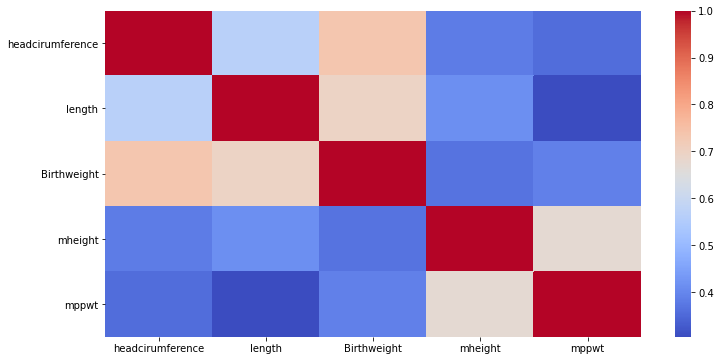

In [7]:
corr = df[target_cols].corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap='coolwarm')

Step 4: You will now develop two SLR Models to answer to the two research questions

Step 5: Constructing the training and testing sets for the 2 SLR.

1.	Research question# 1, configure the attribute “mppwt” as predictor(independent) variable and “Birthweight” outcome (dependent) variable. 


In [8]:
X_mmpwt = df.iloc[:,9:10].values #mmpwt as independent
y_bw = df.iloc[:,3].values #birthweight as dependent

In [9]:
# train test split 
X_mmpwt_train, X_mmpwt_test, y_bw_train, y_bw_test = train_test_split(X_mmpwt,y_bw,test_size = 0.2, random_state=1)
lr = LinearRegression()
lr.fit(X_mmpwt_train, y_bw_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
print(lr.intercept_)

2.07442059205579


In [11]:
print(lr.coef_)

[0.04247154]


The Intercept and coefficiant here shows that the mmpwt have relatioship with birthweight because the coefficient is 0.04. Since a statistical significant requires the coeffienct between -0.1 to 0.1, this coefficient is statitcal siginificant dependent and independent variable.

In [12]:
y_bw_pred = lr.predict(X_mmpwt_test) #use model to predict on test dataset

# compare the result
s1 = "{0:<9} | {1:<9}".format("Predicted","Answer")
s2 = "{0:<9} | {1:<9}".format("---------","-------")
print(s1)
print(s2)
for p, a in zip( y_bw_pred, y_bw_test):
    s = "{0:<9} | {1:<9}".format(round(p,2),round(a,2))
    print(s)

Predicted | Answer   
--------- | -------  
7.38      | 4.5      
8.02      | 6.4      
7.6       | 6.9      
7.38      | 10.0     
9.29      | 8.5      
7.81      | 6.0      
8.53      | 7.5      
7.04      | 6.9      
7.17      | 7.0      


In [13]:
y_bw_pred

array([7.38336339, 8.02043652, 7.5957211 , 7.38336339, 9.29458279,
       7.80807881, 8.53009503, 7.04359105, 7.17100567])

In [14]:
# predict on train dataset and plot the graph
mmpwt_x_pred = lr.predict(X_mmpwt_train)

Plot Training Dataset

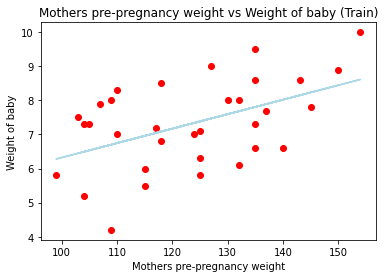

In [15]:
# plot the train data and regression line
plt.scatter(X_mmpwt_train,y_bw_train,color='red') # plot the scatter data in red
plt.plot(X_mmpwt_train,mmpwt_x_pred,color='lightblue') # plot the regression line
plt.title('Mothers pre-pregnancy weight vs Weight of baby (Train)')
plt.xlabel('Mothers pre-pregnancy weight')
plt.ylabel('Weight of baby')
plt.show()

Plot Testing Dataset

In [16]:
# predict on train dataset and plot the graph
mmpwt_test_pred = lr.predict(X_mmpwt_test)

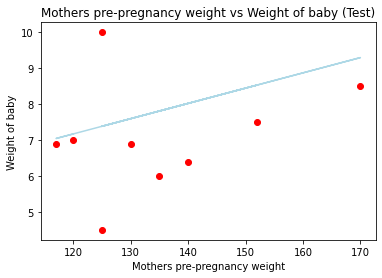

In [17]:
# plot the train data and regression line
plt.scatter(X_mmpwt_test,y_bw_test,color='red') # plot the scatter data in red
plt.plot(X_mmpwt_test,mmpwt_test_pred,color='lightblue') # plot the regression line
plt.title('Mothers pre-pregnancy weight vs Weight of baby (Test)')
plt.xlabel('Mothers pre-pregnancy weight')
plt.ylabel('Weight of baby')
plt.show()

2.	Research question# 2, configure the attribute “mheight” as predictor(independent) variable and “Length” outcome (dependent) variable

In [18]:
X_mh = df.iloc[:,8:9].values # select mother height
y_le = df.iloc[:,2].values # select baby legnth

In [19]:
# train test split data
X_mh_train, X_mh_test, y_le_train, y_le_test = train_test_split(X_mh,y_le,test_size = 0.2, random_state=1)
lr_two = LinearRegression()
lr_two.fit(X_mh_train,y_le_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
print(lr_two.intercept_)

1.636701797892119


In [21]:
print(lr_two.coef_)

[0.28456293]


The Intercept and coefficiant here shows that the baby legnth doesn't have relatioship with mother height because the coefficient is 0.28. Since a statistical significant requires the coeffienct between -0.1 to 0.1, this coefficient doesn't have any statitcal siginificant between dependent and independent variable.

In [22]:
y_le_pred = lr_two.predict(X_mh_test) #use model to predict on test dataset

# compare the result
s1 = "{0:<9} | {1:<9}".format("Predicted","Answer")
s2 = "{0:<9} | {1:<9}".format("---------","-------")
print(s1)
print(s2)
for p, a in zip( y_le_pred, y_le_test):
    s = "{0:<9} | {1:<9}".format(round(p,2),round(a,2))
    print(s)

Predicted | Answer   
--------- | -------  
20.13     | 18       
20.13     | 19       
20.13     | 20       
19.56     | 22       
20.7      | 20       
20.42     | 20       
21.84     | 20       
19.56     | 20       
19.0      | 21       


Plot Training Dataset

In [23]:
mh_x_pred = lr_two.predict(X_mh_train)

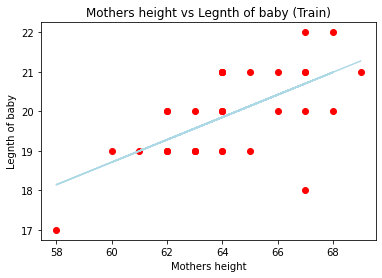

In [24]:
plt.scatter(X_mh_train,y_le_train,color='red') # plot the scatter data in red
plt.plot(X_mh_train,mh_x_pred,color='lightblue') # plot the regression line
plt.title('Mothers height vs Legnth of baby (Train)')
plt.xlabel('Mothers height')
plt.ylabel('Legnth of baby')
plt.show()

Plot Testing Dataset

In [25]:
mh_test_pred = lr_two.predict(X_mh_test)

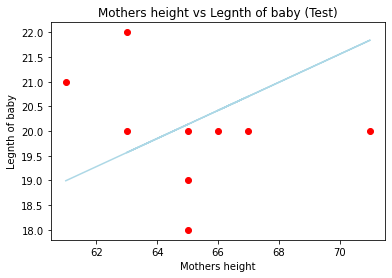

In [26]:
plt.scatter(X_mh_test,y_le_test,color='red') # plot the scatter data in red
plt.plot(X_mh_test,mh_test_pred,color='lightblue') # plot the regression line
plt.title('Mothers height vs Legnth of baby (Test)')
plt.xlabel('Mothers height')
plt.ylabel('Legnth of baby')
plt.show()

**Research question:**
1.	Check if baby birthweight is dependent upon mother’s pre-pregnancy weight

  In these two variables, I get the coefficient of 0.04, which is smaller than 0.1. It is a statistically significant result. Hence, I can conclude the baby's height is dependent on the mother's pre-pregnancy weight. When a mother's pre-pregnancy weight is heavier, the baby born tends to have a heavier weight. 

2.	Check if the baby length is dependent upon mother's height

  Using the baby length and mother's height as dependent and independent variables, I got the coefficient of 0.28. It is more significant than 0.1, so it is not statistically significant. Hence, the baby's length doesn't depend on the mother's height. There isn't a relationship between these two variables. Also, from the data point, I can see the same result. When mother's height from 60 to 65 inches, they could all born the baby with 19 inches long. Similiar data as the baby length from 20 to 22. Therefore, I think the baby's length isn't dependent on the mother's height


**PART B  [20 pts]**

Step 1: Some data cleanup may be necessary. 

Let us go ahead and drop the features “id
”, “LowBirthWeight”, and “lowbwt”.


In [27]:
df.shape

(42, 17)

In [28]:
df.drop(columns = ['id', 'LowBirthWeight','lowbwt'], inplace=True)

Verify that these columns are now gone. 

In [29]:
df.shape #reduced from 17 columns to 14 colums

(42, 14)

Step 2: Setup your X matrix with all the independent variables left and your target of prediction is “Birthweight” which goes to y matrix.

In [30]:
X_mr = df.iloc[:,:].drop('Birthweight', axis = 1).values
y_mr = df.loc[:,'Birthweight'].values

Step 3: Split your data set into training and testing with a split ratio of 75:25. 

In [31]:
X_mr_train, X_mr_test, y_mr_train, y_mr_test = train_test_split(X_mr, y_mr, test_size = 0.25, random_state=1)

Step 4: After importing the necessary Linear Regression libraries, create and fit your model. 

In [32]:
lr_mr = LinearRegression()
lr_mr.fit(X_mr_train, y_mr_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Step 5: Print your intercept value. What do you find here?

In [33]:
print(lr_mr.intercept_)

-12.339669419538508


The negative intercept shows if all the variables set to 0, y will be negative. It doesn't mean any concern of the data.

Step 6: Print all your coefficients. You will see this as an array.

In [34]:
print(lr_mr.coef_)

[ 0.590136    0.03000425  0.21330839 -0.14330002  0.08514757 -0.01000675
  0.10939804 -0.00088544 -0.03010554  0.04135972  0.00392469 -0.08227971
 -0.80309893]


Step 7: Make your predictions. Remember you provide X_test data now. 

In [35]:
y_mr_pred = lr_mr.predict(X_mr_test)

In [36]:
lr_mr.score(X_mr,y_mr) #run the model on the original dataset and see the linear regression score

0.7196092996094259

Step 8: Check your prediction value with actual real values. 

In [37]:
# compare the result
s1 = "{0:<9} | {1:<9}".format("Predicted","Answer")
s2 = "{0:<9} | {1:<9}".format("---------","-------")
print(s1)
print(s2)
for p, a in zip( y_mr_pred, y_mr_test):
    s = "{0:<9} | {1:<9}".format(round(p,2),round(a,2))
    print(s)

Predicted | Answer   
--------- | -------  
6.19      | 4.5      
6.52      | 6.4      
7.94      | 6.9      
7.96      | 10.0     
8.08      | 8.5      
6.81      | 6.0      
7.58      | 7.5      
7.44      | 6.9      
7.06      | 7.0      
7.91      | 9.5      
7.33      | 8.3      


Do a scatter plot to see how they align. 

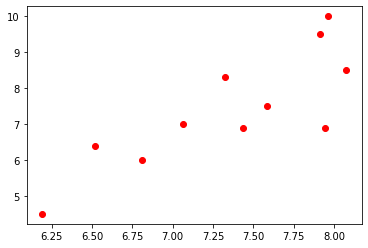

In [38]:
# do I need to add X & y label here?
plt.scatter(y_mr_pred, y_mr_test,color='red')
plt.show()

Step 9: Show the values MAE, MSE, RMSE


In [39]:
print('MAE')
metrics.mean_absolute_error(y_mr_test, y_mr_pred)

MAE


0.8521725894544105

In [40]:
print('MSE')
metrics.mean_squared_error(y_mr_test, y_mr_pred)

MSE


1.156847630230715

In [41]:
print('RMSE')
np.sqrt(metrics.mean_squared_error(y_mr_test, y_mr_pred))

RMSE


1.075568514893735

**Research question:**

In this part, we like to investigate which other variables are significant in predicting the birthweight? Also, check how close your prediction is to actual values?

I think other variables are significant is: legnth, smoker, motherage, mnocig, mppwt, fage, fedyrs, fnocig, fheight. The prediction versus actual is around 72% correct. Code provided below


In [42]:
count = 0
vars = []
for i in list(lr_mr.coef_):
  if -0.1<i<0.1:
    count += 1

print(f"Out of {len(lr_mr.coef_)} features, there are {count} features are statisically significant.")
print(f'These {count} features are some significant variables that we can dig in more to predict the birth weight.')

Out of 13 features, there are 8 features are statisically significant.
These 8 features are some significant variables that we can dig in more to predict the birth weight.


In [43]:
model_score = lr_mr.score(X_mr_train, y_mr_train)
data_score = lr_mr.score(X_mr, y_mr)

In [44]:
print(f"The train data set has a {model_score:.2f} accuracy. When applying this training model to the original dataset it has {data_score:.2f} accuracy.")
print("This accuracy is ok, there is still some way that we can make it better!")

The train data set has a 0.84 accuracy. When applying this training model to the original dataset it has 0.72 accuracy.
This accuracy is ok, there is still some way that we can make it better!
